# Credit Card Fraud Detection Project

## Table of Contents
1. [Introduction](#introduction)
2. [Data Acquisition](#data-acquisition)
3. [Exploratory Data Analysis](#eda)
4. [Data Preprocessing and Feature Engineering](#data-preprocessing)
5. [Model Implementation and Evaluation](#model-implementation)
    1. [Logistic Regression](#lr)
    2. [Decision Trees](#decision-trees)
    3. [Support Vector Machines (SVM)](#svm)
    4. [K-Nearest Neighbors (KNN)](#knn)
6. [Analysis](#analysis)
7. [Model Comparison](#model-comparison)
8. [Conclusion](#conclusion)
---

This project will include both code and visualizations for better insights and interpretations.

## 1. Introduction <a name="introduction"></a>
This notebook will test different machine learning algorithms to detect fraudulent transactions using supervised learning techniques.
The primary objective is to train and compare the performance of various ML algorithms <br>
### Goals
 - Explore and understand the dataset
 - Handle the imbalanced data
 - Process the data
 - Train ML models and compare their performance

## 2. Data Acquisition <a name="data-acquisition"></a>
- **Dataset**: We will use a dataset such as the [Credit Card Fraud Detection dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud) available on Kaggle, which includes anonymized transaction details and a fraud label.

In [5]:
# !kaggle datasets download -d mlg-ulb/creditcardfraud

In [6]:
# !unzip creditcardfraud.zip  

In [7]:
# !ls

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("creditcard.csv")

In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 3. Exploratory Data Analysis <a name="eda"></a>
- **Objective**: Analyze the data set, check for any missing values, and review class distributions.

### Dataset description

The dataset contains transactions made by credit cards in September 2013 by European cardholders. <br>
The dataset contains **31** columns and **284807** entries. <br>
The columns **V1** through **V28** are anonymized transaction details. <br> 
These 28 columns are transactions details acheived after performing PCA transformation. <br>
Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. <br>
The feature 'Amount' is the transaction amount. The 'Class' feature classifies whether the transaction was fradulent(1) or safe(0).<br>
There are no null cells.

In [12]:
df.shape

(284807, 31)

In [13]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [14]:
df[['Time','Amount', 'Class'] ].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [15]:
df.isnull().sum().sum()

0

### Visulaizing class discrepancies 

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

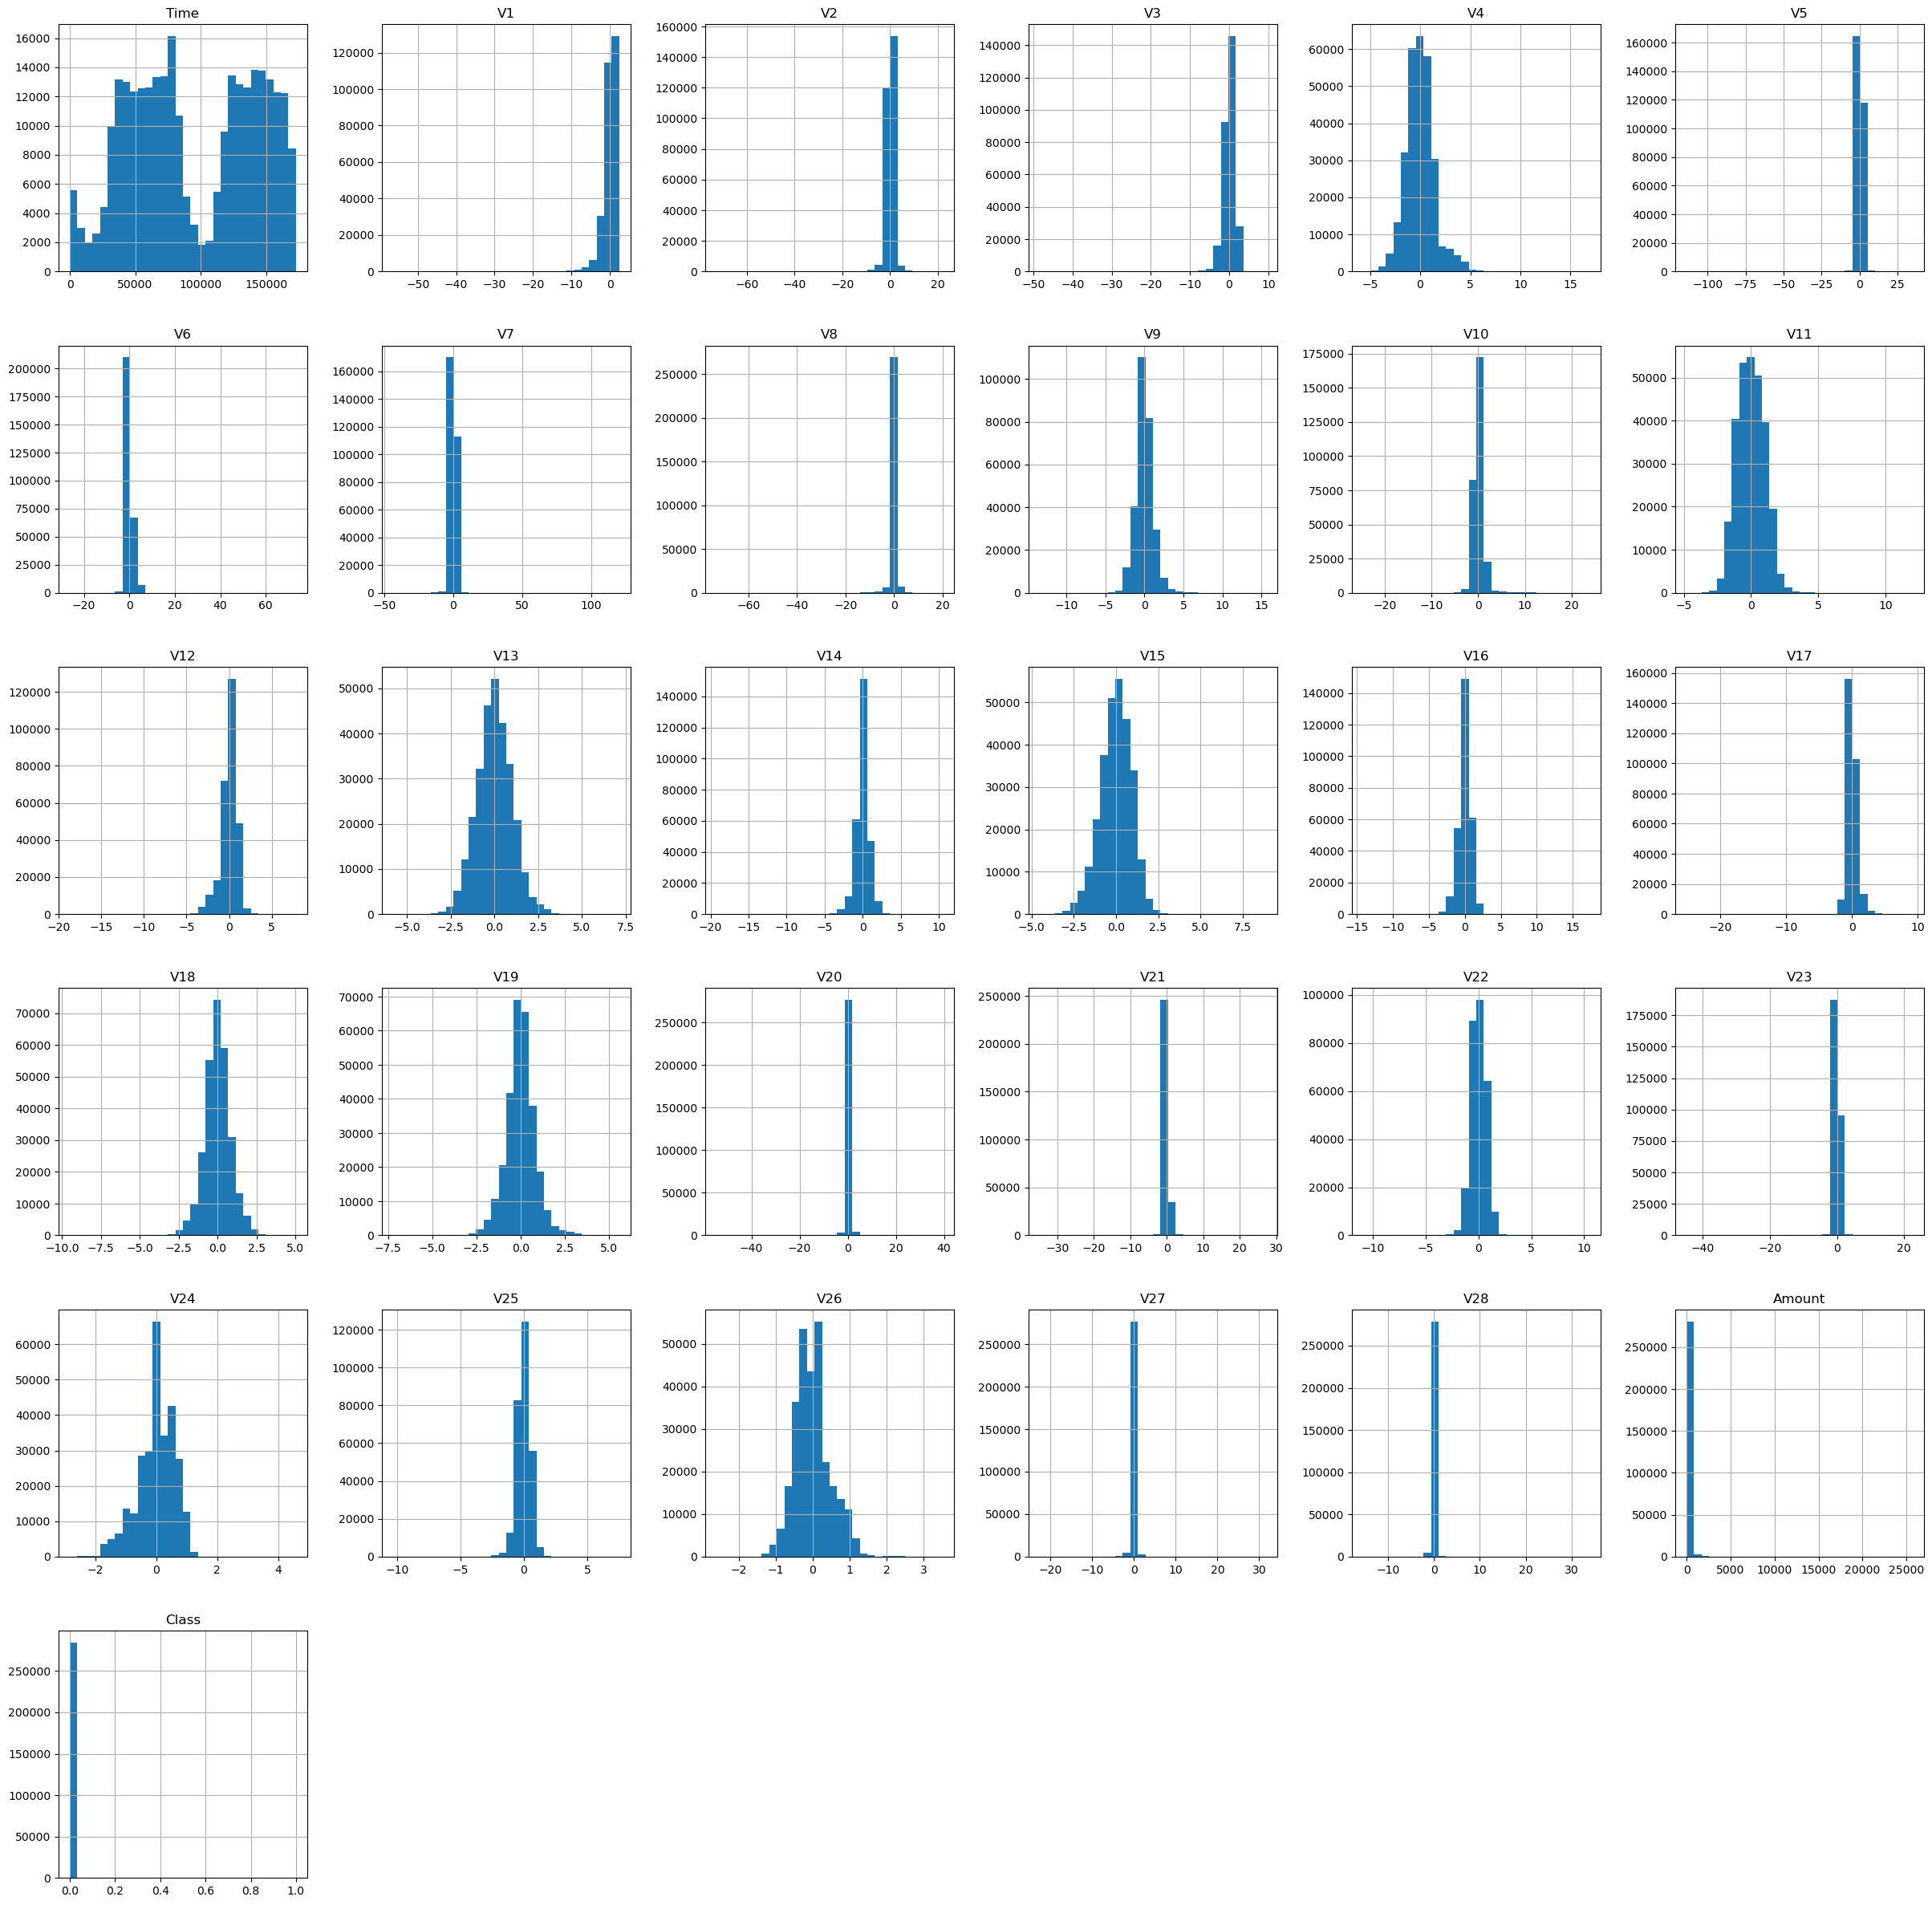

In [17]:
df.hist(bins=30,figsize=(30,30))

## 4. Data Preprocessing and Feature Engineering <a name="data-preprocessing"></a>

### Objectives
 - Scaling of the "Amount" column
 - Standardization of the "Time" column
 - Handling the class Imbalance

### Scaling Amount column

<Axes: >

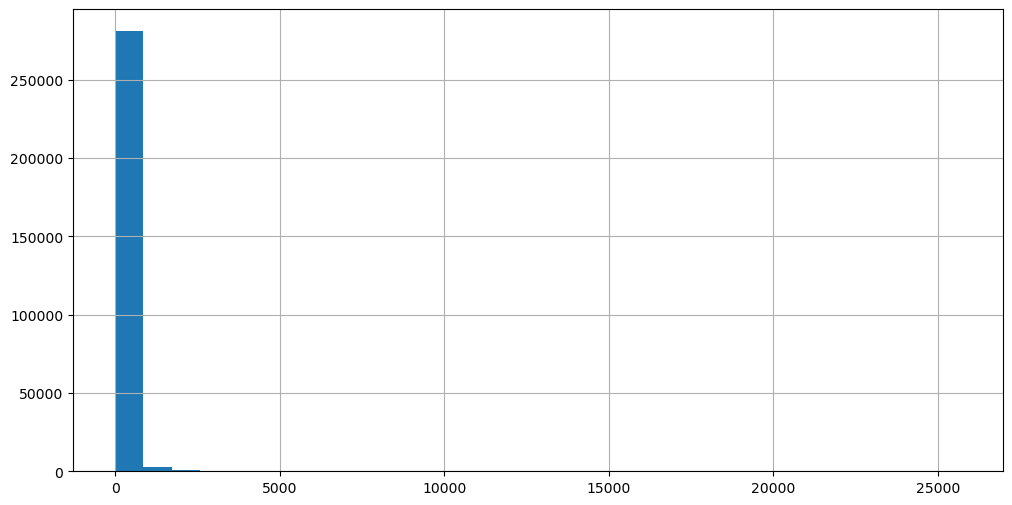

In [20]:
df['Amount'].hist(bins=30,figsize=(12, 6))

The above graph shows that most of the transaction amounts are smaller values and there are a few large outliers. <br>
This can negatively affect our prediction models. To prevent this, we can scale our data using robust scaler to reduce the impact of the outliers. <br>

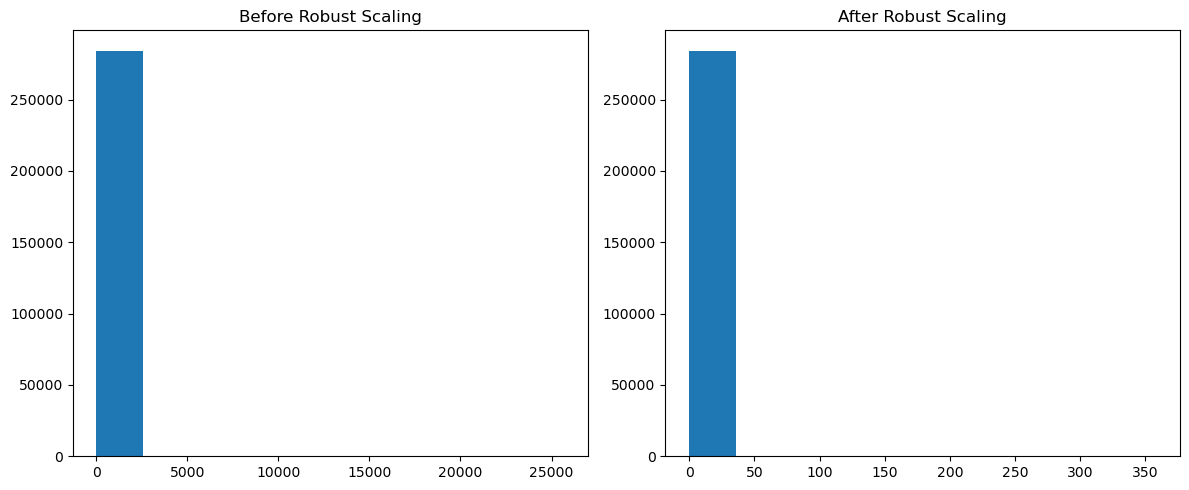

In [22]:
from sklearn.preprocessing import RobustScaler

fig, ax = plt.subplots(1, 2, figsize=(12, 5))  

ax[0].hist(df['Amount'])
ax[0].set_title("Before Robust Scaling")

new_df = df.copy()
new_df['Amount'] = RobustScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1, 1))

ax[1].hist(new_df['Amount'])
ax[1].set_title("After Robust Scaling")

plt.tight_layout()
plt.show()

In [23]:
print(f"Before scaling\n{df['Amount'].describe()}\n")
print(f"After scaling\n{new_df['Amount'].describe()}")

Before scaling
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

After scaling
count    284807.000000
mean          0.927124
std           3.495006
min          -0.307413
25%          -0.229162
50%           0.000000
75%           0.770838
max         358.683155
Name: Amount, dtype: float64


### Standardizing time data

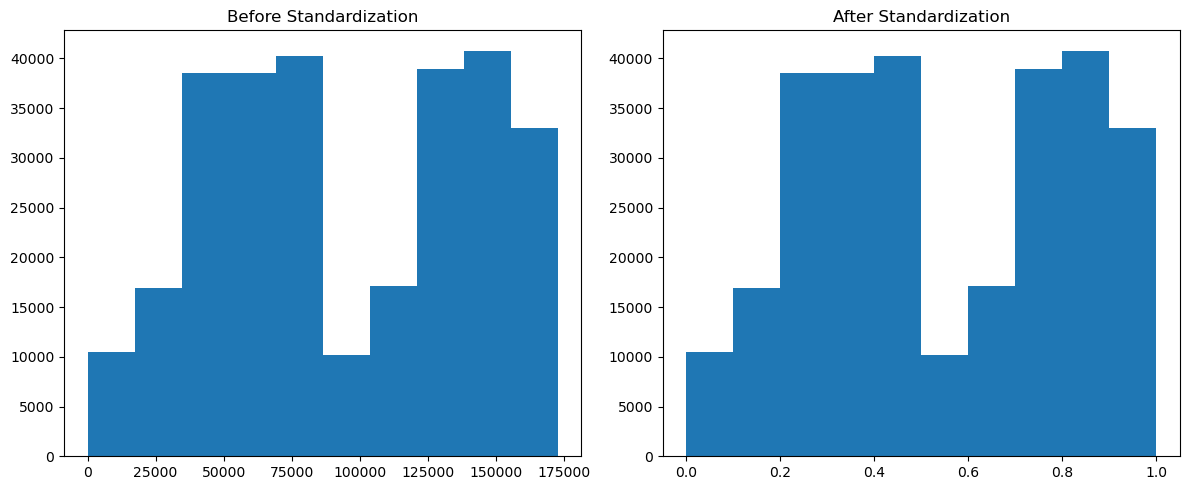

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))  

ax[0].hist(df['Time'])
ax[0].set_title("Before Standardization")

new_df['Time'] = (new_df['Time'] - new_df['Time'].min()) / (new_df['Time'].max() - new_df['Time'].min())

ax[1].hist(new_df['Time'])
ax[1].set_title("After Standardization")

plt.tight_layout()
plt.show()

In [26]:
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


### Handling Imbalanced dataset
The number of fraud classes are significantly less that non-fraud classes. Such an imbalance can cause the models to have a bias towards the majority class. To solve this imbalance, we will be using 3 methods <br>
  1. Random Under Sampling
  2. Over Sampling
  3. SMOTE 

In [28]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

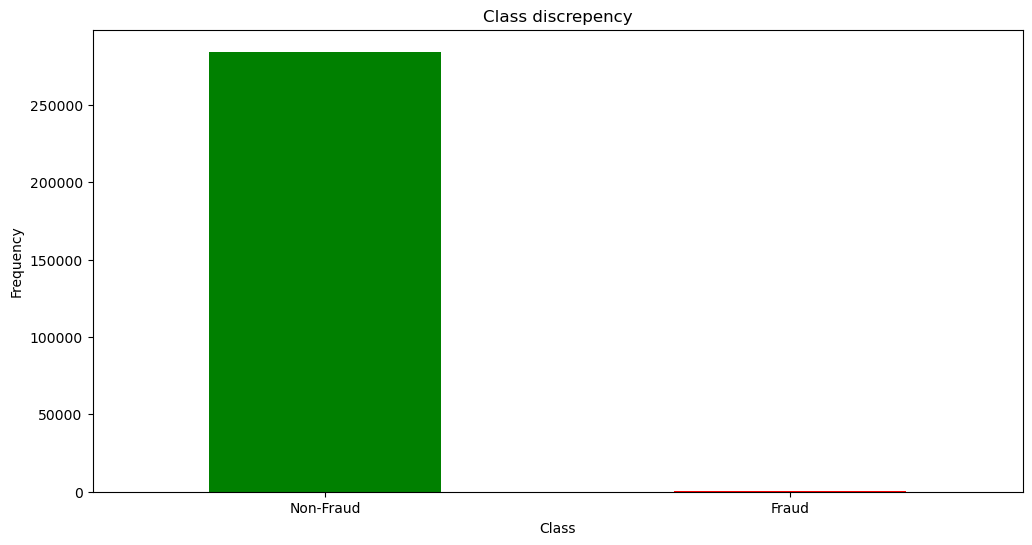

In [29]:
plt.figure(figsize=(12, 6))
df['Class'].value_counts().plot(kind="bar", color=['green', 'red'])
plt.title("Class discrepency")
plt.ylabel("Frequency")
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'], rotation=0)
plt.show()

In [30]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

### Random under sampling 

In [32]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42) # random state so that both columns are randomized together
X_under, y_under = under_sampler.fit_resample(X, y)
data_under = pd.concat([X_under, y_under], axis=1)
print("Original dataset shape:", new_df.shape)
print("Under-sampled dataset shape:", data_under.shape)

Original dataset shape: (284807, 31)
Under-sampled dataset shape: (984, 31)


### Over Sampling

In [33]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_over, y_over = over_sampler.fit_resample(X, y)
data_over = pd.concat([X_over, y_over], axis=1)
print("Original dataset shape:", new_df.shape)
print("Over-sampled dataset shape:", data_over.shape)

Original dataset shape: (284807, 31)
Over-sampled dataset shape: (568630, 31)


### SMOTE

In [34]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
data_smote = pd.concat([X_smote, y_smote], axis=1)
print("Original dataset shape:", new_df.shape)
print("SMOTE dataset shape:", data_smote.shape)

Original dataset shape: (284807, 31)
SMOTE dataset shape: (568630, 31)


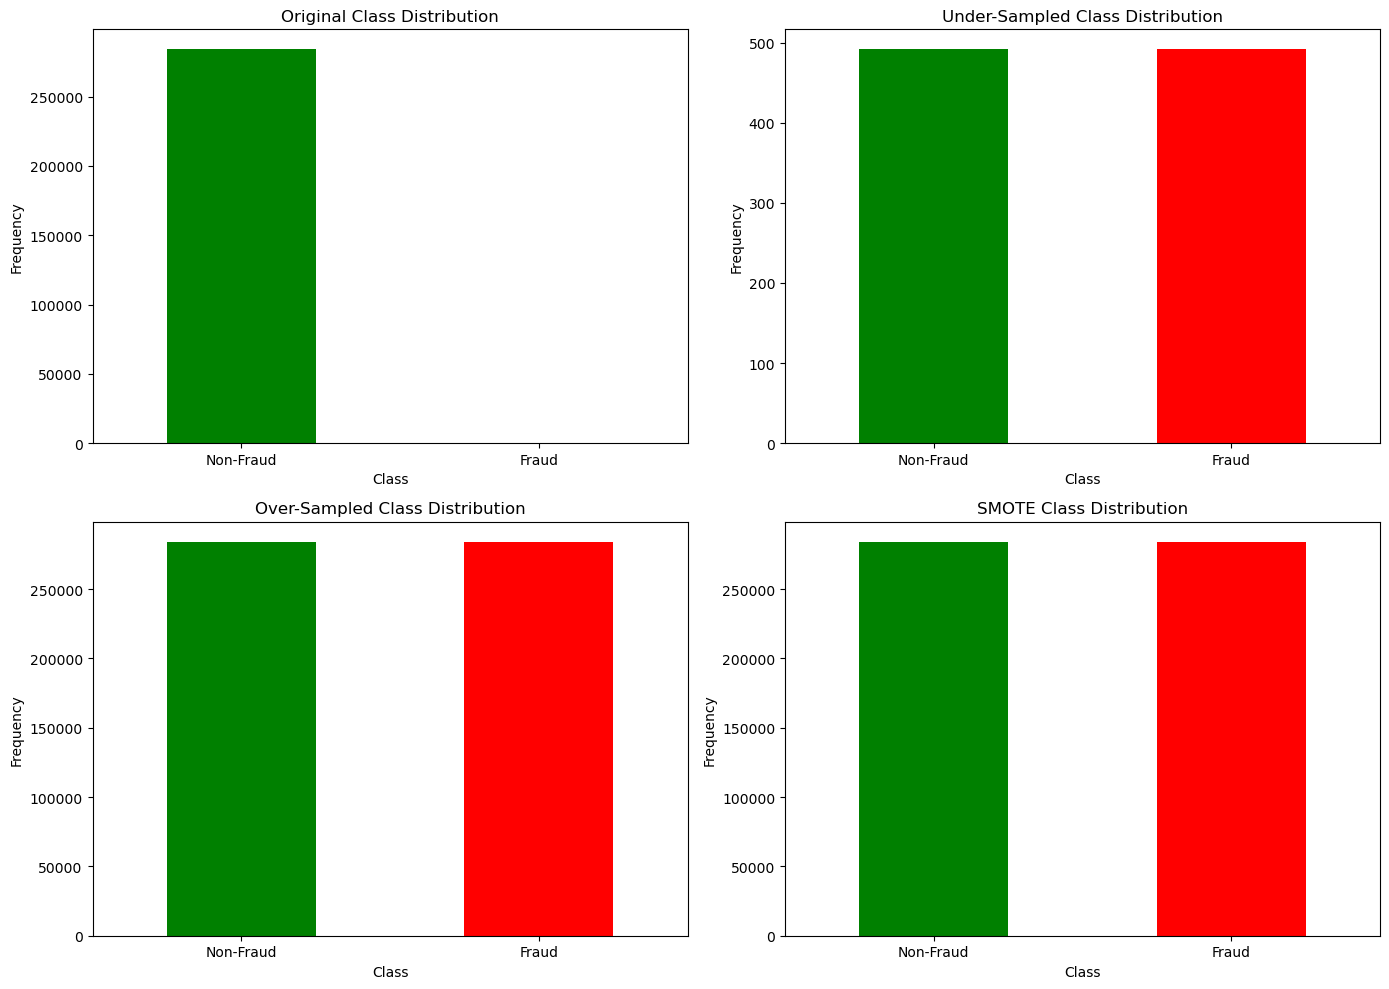

In [35]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
new_df['Class'].value_counts().plot(kind="bar", color=['green', 'red'])
plt.title("Original Class Distribution")
plt.ylabel("Frequency")
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'], rotation=0)

# Under-Sampled Dataset
plt.subplot(2, 2, 2)
data_under['Class'].value_counts().plot(kind="bar", color=['green', 'red'])
plt.title("Under-Sampled Class Distribution")
plt.ylabel("Frequency")
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'], rotation=0)

# Over-Sampled Dataset
plt.subplot(2, 2, 3)
data_over['Class'].value_counts().plot(kind="bar", color=['green', 'red'])
plt.title("Over-Sampled Class Distribution")
plt.ylabel("Frequency")
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'], rotation=0)

# SMOTE Dataset
plt.subplot(2, 2, 4)
data_smote['Class'].value_counts().plot(kind="bar", color=['green', 'red'])
plt.title("SMOTE Class Distribution")
plt.ylabel("Frequency")
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'], rotation=0)

# Adjust layout and display
plt.tight_layout()
plt.show()

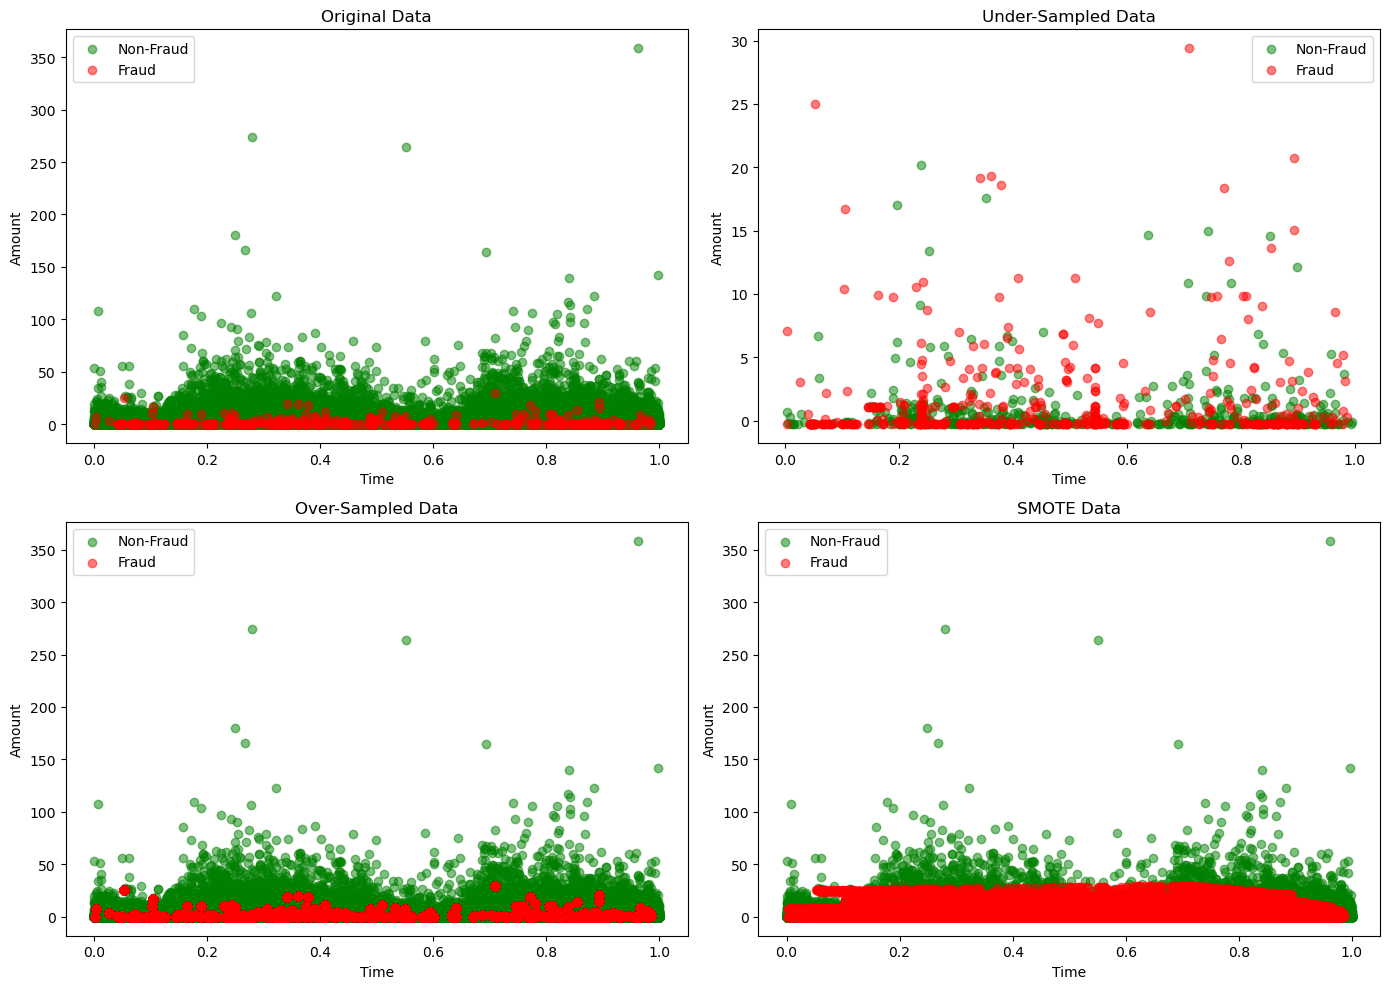

In [36]:
plt.figure(figsize=(14, 10))

# Original Dataset Scatter Plot
plt.subplot(2, 2, 1)
plt.scatter(new_df[new_df['Class'] == 0]['Time'], new_df[new_df['Class'] == 0]['Amount'], alpha=0.5, c='green', label='Non-Fraud')
plt.scatter(new_df[new_df['Class'] == 1]['Time'], new_df[new_df['Class'] == 1]['Amount'], alpha=0.5, c='red', label='Fraud')
plt.title("Original Data")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.legend()

# Under-Sampled Dataset Scatter Plot
plt.subplot(2, 2, 2)
plt.scatter(data_under[data_under['Class'] == 0]['Time'], data_under[data_under['Class'] == 0]['Amount'], alpha=0.5, c='green', label='Non-Fraud')
plt.scatter(data_under[data_under['Class'] == 1]['Time'], data_under[data_under['Class'] == 1]['Amount'], alpha=0.5, c='red', label='Fraud')
plt.title("Under-Sampled Data")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.legend()

# Over-Sampled Dataset Scatter Plot
plt.subplot(2, 2, 3)
plt.scatter(data_over[data_over['Class'] == 0]['Time'], data_over[data_over['Class'] == 0]['Amount'], alpha=0.5, c='green', label='Non-Fraud')
plt.scatter(data_over[data_over['Class'] == 1]['Time'], data_over[data_over['Class'] == 1]['Amount'], alpha=0.5, c='red', label='Fraud')
plt.title("Over-Sampled Data")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.legend()

# SMOTE Dataset Scatter Plot
plt.subplot(2, 2, 4)
plt.scatter(data_smote[data_smote['Class'] == 0]['Time'], data_smote[data_smote['Class'] == 0]['Amount'], alpha=0.5, c='green', label='Non-Fraud')
plt.scatter(data_smote[data_smote['Class'] == 1]['Time'], data_smote[data_smote['Class'] == 1]['Amount'], alpha=0.5, c='red', label='Fraud')
plt.title("SMOTE Data")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

## 5. Model Implementation and Evaluation<a name="model-implementation"></a>
- **Objective**: Train multiple models to detect fraud in transactions.
- **Models to Train**:
  - [Logistic Regression](#lr)
  - [K-Nearest Neighbors (KNN)](#knn)
  - [Decision Trees](#decision-trees)
  - [Support Vector Machines (SVM)](#svm)
  

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Naming datasets for identification in the results
new_df.name = "Original"
data_under.name = "Under-Sampled"
data_over.name = "Over-Sampled"
data_smote.name = "SMOTE"

### Logistic Regression <a name="lr"></a>

Results for Original Dataset:


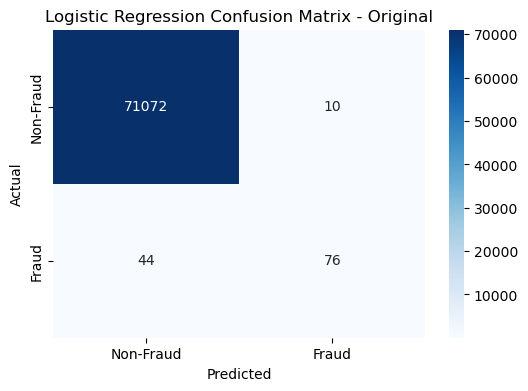


Results for Under-Sampled Dataset:


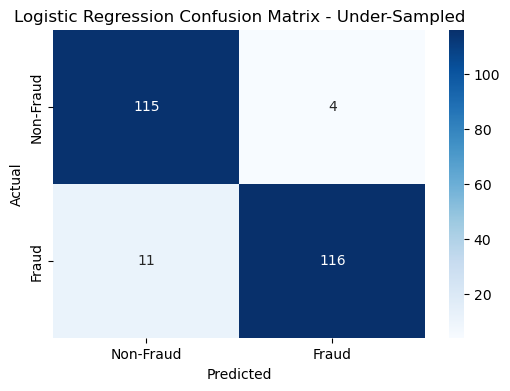


Results for Over-Sampled Dataset:


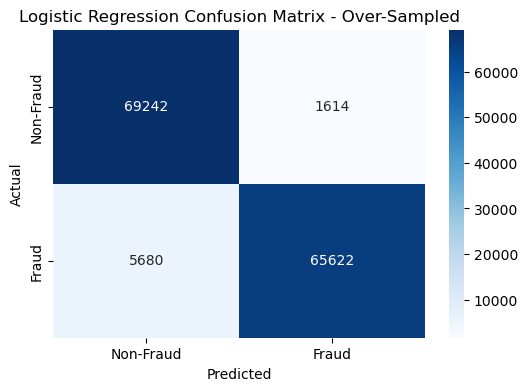


Results for SMOTE Dataset:


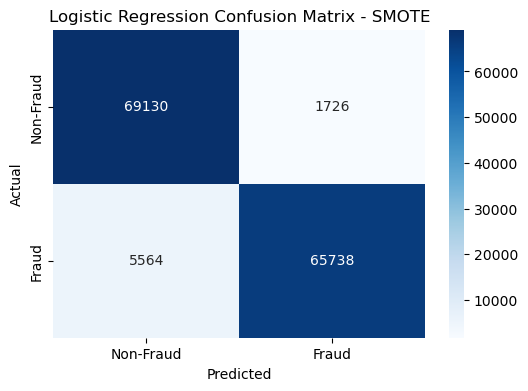


Final Logistic Regression Results:
                 Model       Sampling  Accuracy  Precision (Non-Fraud)  Recall (Non-Fraud)  F1-Score (Non-Fraud)  Precision (Fraud)  Recall (Fraud)  F1-Score (Fraud)
0  Logistic Regression       Original     0.999                  0.999               1.000                 1.000              0.884           0.633             0.738
1  Logistic Regression  Under-Sampled     0.939                  0.913               0.966                 0.939              0.967           0.913             0.939
2  Logistic Regression   Over-Sampled     0.949                  0.924               0.977                 0.950              0.976           0.920             0.947
3  Logistic Regression          SMOTE     0.949                  0.926               0.976                 0.950              0.974           0.922             0.947


In [95]:
def logistic_regression_classifier(data_set, results_list):
    X = data_set.iloc[:, :-1].values
    y = data_set.iloc[:, -1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    
    classifier = LogisticRegression(random_state=0, max_iter=1000)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud'], output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    
    results_list.append({
        'Model': 'Logistic Regression',
        'Sampling': data_set.name,
        'Accuracy': accuracy,
        'Precision (Non-Fraud)': report['Non-Fraud']['precision'],
        'Recall (Non-Fraud)': report['Non-Fraud']['recall'],
        'F1-Score (Non-Fraud)': report['Non-Fraud']['f1-score'],
        'Precision (Fraud)': report['Fraud']['precision'],
        'Recall (Fraud)': report['Fraud']['recall'],
        'F1-Score (Fraud)': report['Fraud']['f1-score']
    })
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f"Logistic Regression Confusion Matrix - {data_set.name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Usage
results_logistic = []
print("Results for Original Dataset:")
logistic_regression_classifier(new_df, results_logistic)

print("\nResults for Under-Sampled Dataset:")
logistic_regression_classifier(data_under, results_logistic)

print("\nResults for Over-Sampled Dataset:")
logistic_regression_classifier(data_over, results_logistic)

print("\nResults for SMOTE Dataset:")
logistic_regression_classifier(data_smote, results_logistic)

results_df_logistic = pd.DataFrame(results_logistic)
results_df_logistic = results_df_logistic.round(3)

print("\nFinal Logistic Regression Results:")
print(results_df_logistic)

### K-Nearest Neighbors (KNN) <a name="knn"></a>

Results for Original Dataset:


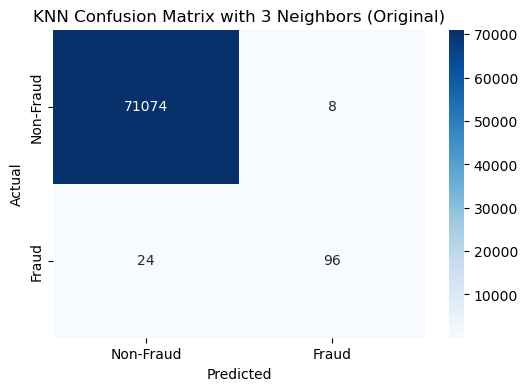


Results for Under-Sampled Dataset:


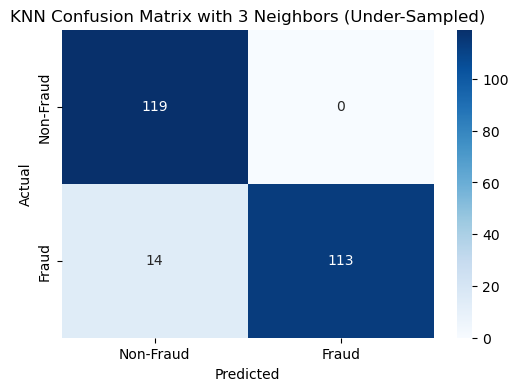


Results for Over-Sampled Dataset:


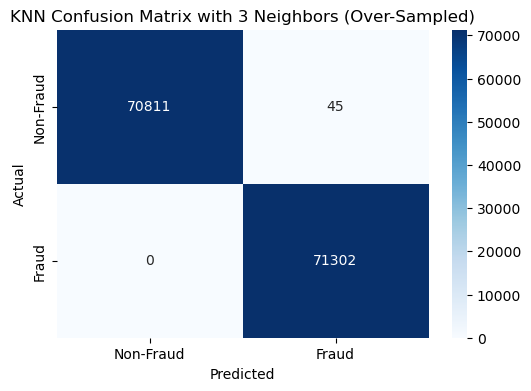


Results for SMOTE Dataset:


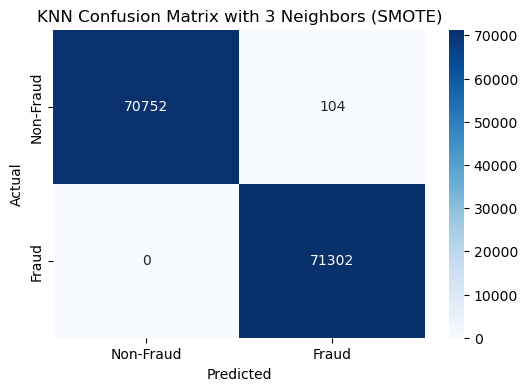

  Model       Sampling  Neighbors  Accuracy  Precision (Non-Fraud)  Recall (Non-Fraud)  F1-Score (Non-Fraud)  Precision (Fraud)  Recall (Fraud)  F1-Score (Fraud)
0   KNN       Original          3     1.000                  1.000               1.000                 1.000              0.923            0.80             0.857
1   KNN  Under-Sampled          3     0.943                  0.895               1.000                 0.944              1.000            0.89             0.942
2   KNN   Over-Sampled          3     1.000                  1.000               0.999                 1.000              0.999            1.00             1.000
3   KNN          SMOTE          3     0.999                  1.000               0.999                 0.999              0.999            1.00             0.999


In [41]:
def knn(data_set, neighbors, results_list):

    X = data_set.iloc[:, :-1].values
    y = data_set.iloc[:, -1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski', p=2)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud'], output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    
    results_list.append({
        'Model': 'KNN',
        'Sampling': data_set.name,
        'Neighbors': neighbors,
        'Accuracy': accuracy,
        'Precision (Non-Fraud)': report['Non-Fraud']['precision'],
        'Recall (Non-Fraud)': report['Non-Fraud']['recall'],
        'F1-Score (Non-Fraud)': report['Non-Fraud']['f1-score'],
        'Precision (Fraud)': report['Fraud']['precision'],
        'Recall (Fraud)': report['Fraud']['recall'],
        'F1-Score (Fraud)': report['Fraud']['f1-score']
    })
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f"KNN Confusion Matrix with {neighbors} Neighbors ({data_set.name})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

results_knn = []
print("Results for Original Dataset:")
knn(new_df, neighbors=3, results_list=results_knn)

print("\nResults for Under-Sampled Dataset:")
knn(data_under, neighbors=3, results_list=results_knn)

print("\nResults for Over-Sampled Dataset:")
knn(data_over, neighbors=3, results_list=results_knn)

print("\nResults for SMOTE Dataset:")
knn(data_smote, neighbors=3, results_list=results_knn)

results_df_knn = pd.DataFrame(results_knn)
print(results_df_knn.round(3))

### Decision Trees <a name="decision-trees"></a>

Results for Original Dataset:


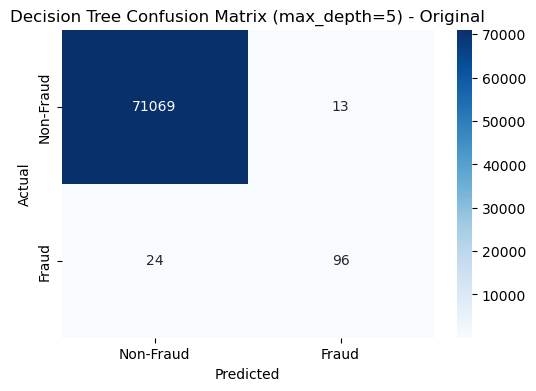


Results for Under-Sampled Dataset:


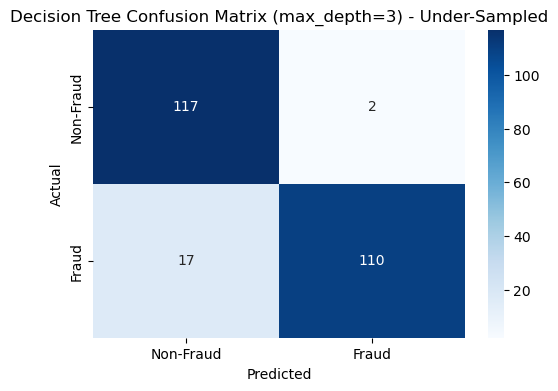


Results for Over-Sampled Dataset:


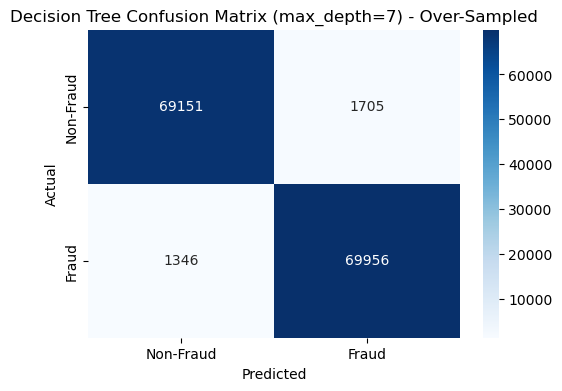


Results for SMOTE Dataset:


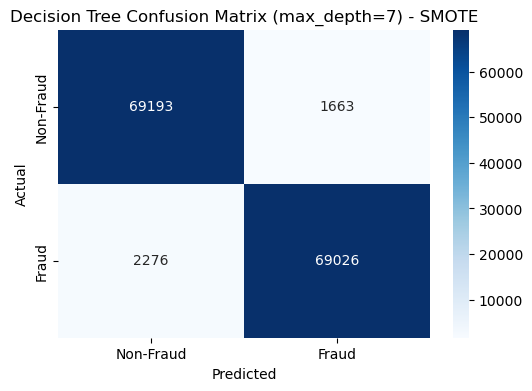

           Model       Sampling  Max Depth  Accuracy  Precision (Non-Fraud)  Recall (Non-Fraud)  F1-Score (Non-Fraud)  Precision (Fraud)  Recall (Fraud)  F1-Score (Fraud)
0  Decision Tree       Original          5     0.999                  1.000               1.000                 1.000              0.881           0.800             0.838
1  Decision Tree  Under-Sampled          3     0.923                  0.873               0.983                 0.925              0.982           0.866             0.921
2  Decision Tree   Over-Sampled          7     0.979                  0.981               0.976                 0.978              0.976           0.981             0.979
3  Decision Tree          SMOTE          7     0.972                  0.968               0.977                 0.972              0.976           0.968             0.972


In [43]:
def decision_tree(data_set, max_depth, results_list):
    
    X = data_set.iloc[:, :-1].values
    y = data_set.iloc[:, -1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    

    classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    

    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud'], output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results in the provided list
    results_list.append({
        'Model': 'Decision Tree',
        'Sampling': data_set.name,
        'Max Depth': max_depth,
        'Accuracy': accuracy,
        'Precision (Non-Fraud)': report['Non-Fraud']['precision'],
        'Recall (Non-Fraud)': report['Non-Fraud']['recall'],
        'F1-Score (Non-Fraud)': report['Non-Fraud']['f1-score'],
        'Precision (Fraud)': report['Fraud']['precision'],
        'Recall (Fraud)': report['Fraud']['recall'],
        'F1-Score (Fraud)': report['Fraud']['f1-score']
    })
    

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f"Decision Tree Confusion Matrix (max_depth={max_depth}) - {data_set.name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

results_dtree = []
print("Results for Original Dataset:")
decision_tree(new_df, max_depth=5, results_list=results_dtree)

print("\nResults for Under-Sampled Dataset:")
decision_tree(data_under, max_depth=3, results_list=results_dtree)

print("\nResults for Over-Sampled Dataset:")
decision_tree(data_over, max_depth=7, results_list=results_dtree)

print("\nResults for SMOTE Dataset:")
decision_tree(data_smote, max_depth=7, results_list=results_dtree)

results_df_dtree = pd.DataFrame(results_dtree)
print(results_df_dtree.round(3))

### Support Vector Machines (SVM) <a name="svm"></a>

Results for Original Dataset:


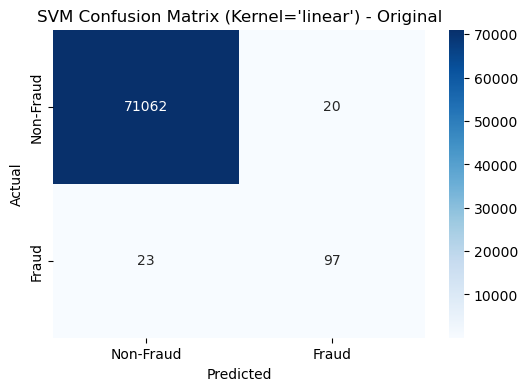


Results for Under-Sampled Dataset:


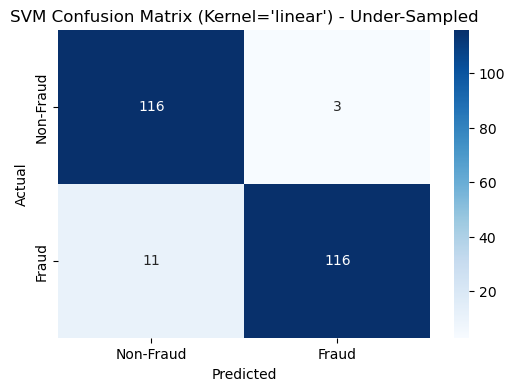

  Model       Sampling  Kernel  Accuracy  Precision (Non-Fraud)  Recall (Non-Fraud)  F1-Score (Non-Fraud)  Precision (Fraud)  Recall (Fraud)  F1-Score (Fraud)
0   SVM       Original  linear     0.999                  1.000               1.000                 1.000              0.829           0.808             0.819
1   SVM  Under-Sampled  linear     0.943                  0.913               0.975                 0.943              0.975           0.913             0.943


In [45]:
def svm_classifier(data_set, kernel, results_list):

    X = data_set.iloc[:, :-1].values
    y = data_set.iloc[:, -1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    

    classifier = SVC(kernel=kernel, random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    

    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud'], output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    

    results_list.append({
        'Model': 'SVM',
        'Sampling': data_set.name,
        'Kernel': kernel,
        'Accuracy': accuracy,
        'Precision (Non-Fraud)': report['Non-Fraud']['precision'],
        'Recall (Non-Fraud)': report['Non-Fraud']['recall'],
        'F1-Score (Non-Fraud)': report['Non-Fraud']['f1-score'],
        'Precision (Fraud)': report['Fraud']['precision'],
        'Recall (Fraud)': report['Fraud']['recall'],
        'F1-Score (Fraud)': report['Fraud']['f1-score']
    })
    

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f"SVM Confusion Matrix (Kernel='{kernel}') - {data_set.name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


results_svm = []
print("Results for Original Dataset:")
svm_classifier(new_df, kernel='linear', results_list=results_svm)

print("\nResults for Under-Sampled Dataset:")
svm_classifier(data_under, kernel='linear', results_list=results_svm)



results_df_svm = pd.DataFrame(results_svm)
print(results_df_svm.round(3))

## 6. Analysis <a name="analysis"></a>
- **Objective**: Analyze the key features contributing to fraud detection using correlation matrix and heatmap

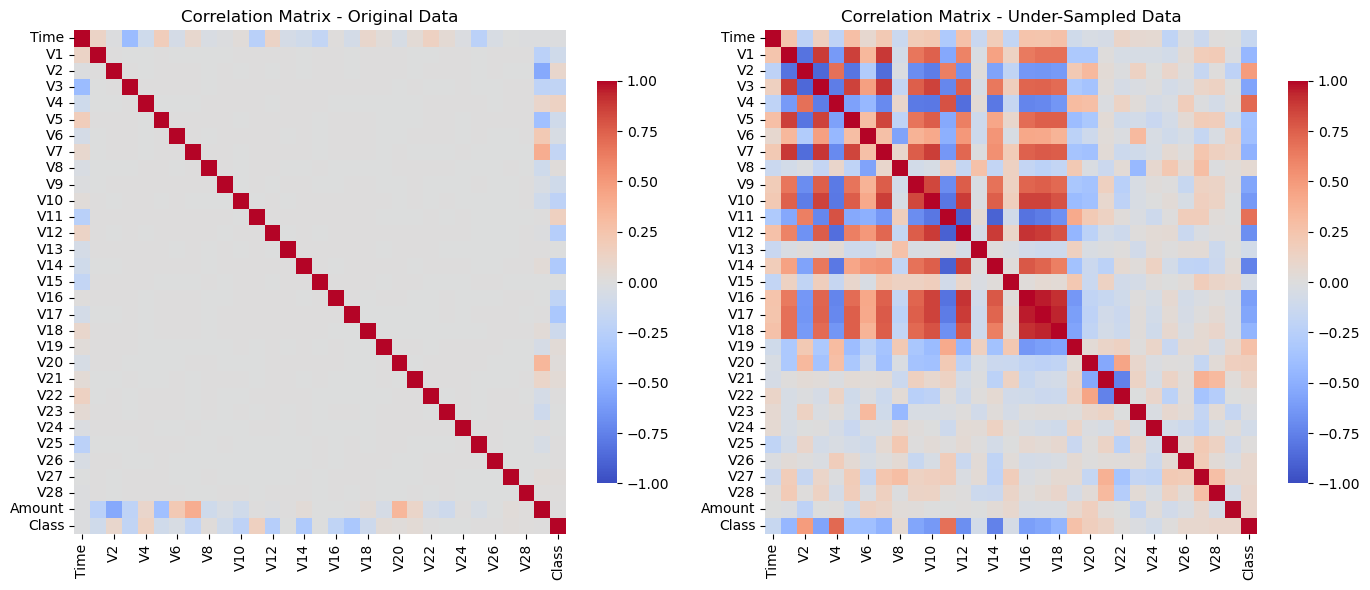

In [47]:
data_under.columns = new_df.columns

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
corr_matrix_original = new_df.corr()
sns.heatmap(corr_matrix_original, cmap="coolwarm", vmin=-1, vmax=1, 
            cbar_kws={'shrink': .8})
plt.title("Correlation Matrix - Original Data")

plt.subplot(1, 2, 2)
corr_matrix_under = data_under.corr()
sns.heatmap(corr_matrix_under, cmap="coolwarm", vmin=-1, vmax=1, 
            cbar_kws={'shrink': .8})
plt.title("Correlation Matrix - Under-Sampled Data")

plt.tight_layout()
plt.show()

Most significant correlations with 'Class' (absolute):
V14    0.749228
V4     0.712610
V11    0.685056
V12    0.682039
Name: Class, dtype: float64


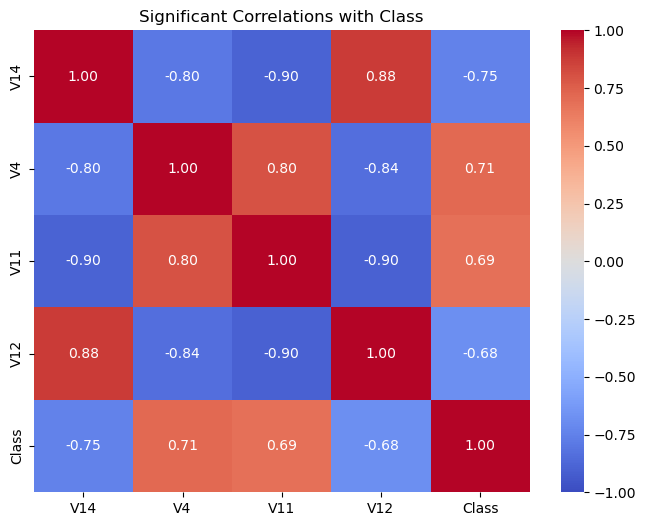

In [125]:
corr_matrix_under = data_under.corr()

class_corr = corr_matrix_under['Class'].abs().sort_values(ascending=False)
top_features = class_corr.index[1:5]  

print("Most significant correlations with 'Class' (absolute):")
print(class_corr[1:5])

plt.figure(figsize=(8, 6))
sns.heatmap(data_under[top_features.tolist() + ['Class']].corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Significant Correlations with Class")
plt.show()

## 7. Model Comparison <a name="model-comparison"></a>
- **Objective**: Understand and compare the different scores achieved by the models to determine which model performed the best 

In [97]:
all_results_df = pd.concat([results_df_knn, results_df_dtree, results_df_svm, results_df_logistic], ignore_index=True)
all_results_df = all_results_df.round(3)
print(all_results_df[['Model', 'Sampling', 'Precision (Fraud)', 'Recall (Fraud)', 'F1-Score (Fraud)', 'Accuracy']].to_string())

                  Model       Sampling  Precision (Fraud)  Recall (Fraud)  F1-Score (Fraud)  Accuracy
0                   KNN       Original              0.923           0.800             0.857     1.000
1                   KNN  Under-Sampled              1.000           0.890             0.942     0.943
2                   KNN   Over-Sampled              0.999           1.000             1.000     1.000
3                   KNN          SMOTE              0.999           1.000             0.999     0.999
4         Decision Tree       Original              0.881           0.800             0.838     0.999
5         Decision Tree  Under-Sampled              0.982           0.866             0.921     0.923
6         Decision Tree   Over-Sampled              0.976           0.981             0.979     0.979
7         Decision Tree          SMOTE              0.976           0.968             0.972     0.972
8                   SVM       Original              0.829           0.808         

In [99]:
sorted_df = all_results_df.sort_values(by='Precision (Fraud)', ascending=False)
filtered_df = sorted_df[~((sorted_df['Model'] == 'KNN') & 
                          (sorted_df['Sampling'].isin(['Over-Sampled', 'SMOTE'])))]
print(filtered_df[['Model', 'Sampling', 'Precision (Fraud)', 'Recall (Fraud)']])

                  Model       Sampling  Precision (Fraud)  Recall (Fraud)
1                   KNN  Under-Sampled              1.000           0.890
5         Decision Tree  Under-Sampled              0.982           0.866
6         Decision Tree   Over-Sampled              0.976           0.981
7         Decision Tree          SMOTE              0.976           0.968
12  Logistic Regression   Over-Sampled              0.976           0.920
9                   SVM  Under-Sampled              0.975           0.913
13  Logistic Regression          SMOTE              0.974           0.922
11  Logistic Regression  Under-Sampled              0.967           0.913
0                   KNN       Original              0.923           0.800
10  Logistic Regression       Original              0.884           0.633
4         Decision Tree       Original              0.881           0.800
8                   SVM       Original              0.829           0.808


In [101]:
sorted_df = all_results_df.sort_values(by='Recall (Fraud)', ascending=False)
filtered_df = sorted_df[~((sorted_df['Model'] == 'KNN') & 
                          (sorted_df['Sampling'].isin(['Over-Sampled', 'SMOTE'])))]
print(filtered_df[['Model', 'Sampling', 'Recall (Fraud)', 'Precision (Fraud)']])

                  Model       Sampling  Recall (Fraud)  Precision (Fraud)
6         Decision Tree   Over-Sampled           0.981              0.976
7         Decision Tree          SMOTE           0.968              0.976
13  Logistic Regression          SMOTE           0.922              0.974
12  Logistic Regression   Over-Sampled           0.920              0.976
9                   SVM  Under-Sampled           0.913              0.975
11  Logistic Regression  Under-Sampled           0.913              0.967
1                   KNN  Under-Sampled           0.890              1.000
5         Decision Tree  Under-Sampled           0.866              0.982
8                   SVM       Original           0.808              0.829
0                   KNN       Original           0.800              0.923
4         Decision Tree       Original           0.800              0.881
10  Logistic Regression       Original           0.633              0.884


In [134]:
sorted_df = all_results_df.sort_values(by='F1-Score (Fraud)', ascending=False)
filtered_df = sorted_df[~((sorted_df['Model'] == 'KNN') & 
                          (sorted_df['Sampling'].isin(['Over-Sampled', 'SMOTE'])))]
print(filtered_df[['Model', 'Sampling', 'F1-Score (Fraud)', 'Accuracy']])

                  Model       Sampling  F1-Score (Fraud)  Accuracy
6         Decision Tree   Over-Sampled             0.979     0.979
7         Decision Tree          SMOTE             0.972     0.972
12  Logistic Regression   Over-Sampled             0.947     0.949
13  Logistic Regression          SMOTE             0.947     0.949
9                   SVM  Under-Sampled             0.943     0.943
1                   KNN  Under-Sampled             0.942     0.943
11  Logistic Regression  Under-Sampled             0.939     0.939
5         Decision Tree  Under-Sampled             0.921     0.923
0                   KNN       Original             0.857     1.000
4         Decision Tree       Original             0.838     0.999
8                   SVM       Original             0.819     0.999
10  Logistic Regression       Original             0.738     0.999


## 8. Conclusion <a name="conclusion"></a> 

In this analysis, we evaluated various models to identify the most effective approach for fraud detection using performance metrics such as precision, recall, and F1-Score. The original dataset showed poor performance across all models, particularly regarding fraud detection metrics.

### Precision

The precision metric (Fraud) indicates the proportion of predicted fraud cases that were truly fraudulent. A high precision score (closer to 1) signifies that most predicted fraud cases were accurate, while a low score points to a significant number of false positives.

- The KNN model with undersampling achieved the highest precision of 1, indicating no false positives. However, it exhibited low recall.
- The Decision Tree models consistently performed well, following KNN, while the oversampled Logistic Regression and undersampled SVMs also performed admirably.
- The unsampled SVM model had the lowest precision, indicating a high number of false positives, which can adversely affect credit card companies by annoying customers and potentially leading them to switch providers.

### Recall

Recall measures how effectively the model identifies actual fraudulent transactions. A high recall suggests that most fraud cases are detected, while a low recall implies many false negatives.

- The oversampled Decision Tree had the highest recall at 0.98, making it particularly effective.
- It was closely followed by the SMOTE-sampled Decision Tree and Logistic Regression models.
- The original unsampled Logistic Regression had the lowest recall of 0.63, indicating a significant number of fraudulent transactions went undetected.

High recall is critical for credit card companies as it minimizes potential losses from undetected fraud, which could otherwise have significant financial implications.

### F1-Score

The F1-Score, representing the harmonic mean of precision and recall, provides a balanced measure of model performance.

- The oversampled Decision Tree attained the highest F1-Score, making it the top model for fraud prediction among all tested methods.
- The top-performing techniques were predominantly from oversampling and SMOTE methods.
- However, it’s essential to recognize that these techniques can introduce synthetic data, potentially leading to misleading performance metrics.

### Exclusion of KNN Oversampled and SMOTE

The KNN models trained on oversampled and SMOTE data were excluded for several reasons:

1. **Artificial Data Points**: Oversampling and SMOTE create synthetic samples that can distort the natural data distribution, leading to overfitting in KNN, which relies heavily on local neighborhoods.
2. **Redundant Application of SMOTE**: KNN on synthetic data generated by SMOTE is counterproductive, as it doesn’t add value to the learning process.
3. **Skewed Performance Metrics**: Models trained on artificially augmented data may present misleadingly high metrics, giving a false sense of performance reliability.

Lastly, SVM model using oversampled and SMOTE data were not evaluated due to extended processing times, emphasizing the need for practical considerations in model evaluation.